The minimum applied current needed for the neuron to produce spikes is 4.00000e-09.


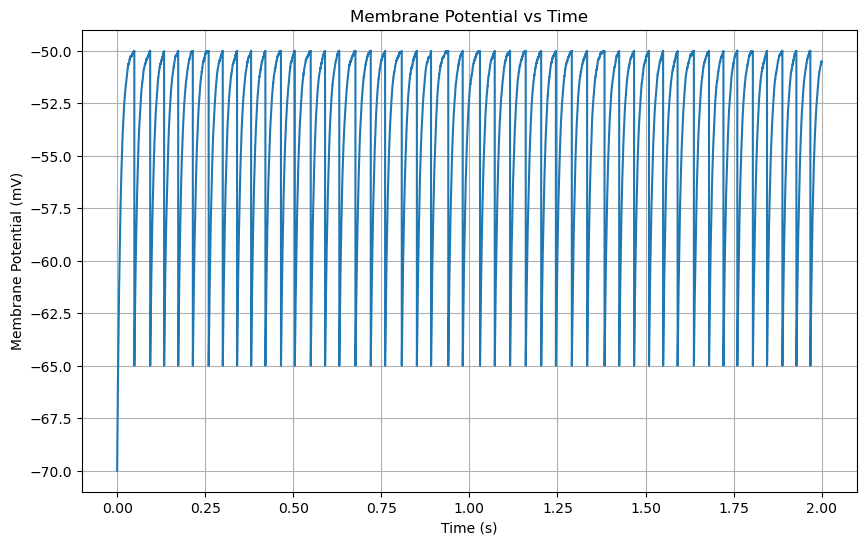

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# 1.a.i Define parameters.
e_leak = -70e-3
r_membrane = 5e6
c_membrane = 2e-9
v_threshold = -50e-3
v_reset = -65e-3
tau_m = c_membrane * r_membrane  # Time constant.


# 1.a.ii Create time vector.
dt = 0.0001
t = np.arange(0, 2, dt)


# 1.a.iii Create vector for membrane potential.
v = np.zeros(len(t))


# 1.a.iv Set initial value of membrane potential to E_leak.
v[0] = e_leak


# 1.a.v Create a vector for applied current I_app, of size identical to the time vector t, with 
#each entry set to a constant value I_0.
I_th = (v_threshold - e_leak) / r_membrane  # Threshold value computed in 1.b.
I_0 = I_th * 1.01
I_app = I_0 * np.ones(len(t))


# 1.a.vi/vii/viii . Set up for loop to run the 4th-order Runge Kutta method, resetting the membrane potential to the reset value if threshold exceeded.

def F(v, t, i_applied):
    global e_leak, r_membrane, c_membrane
    return ((e_leak - v) / (r_membrane * c_membrane)) + ((i_applied) / c_membrane)


def runsim(v, t, t_delta, i_applied, sigma):
    global v_threshold, v_reset, dt
    v_simulated = np.zeros(len(v))
    v_simulated[0] = v[0]
    temp = len(v) - 1
    for n in range(temp):
        K0 = t_delta * (F(v_simulated[n], t[n], i_applied[n]))
        K1 = t_delta * (F(v_simulated[n] + K0 / 2, t[n] + dt / 2, i_applied[n]))
        K2 = t_delta * (F(v_simulated[n] + K1 / 2, t[n] + dt / 2, i_applied[n]))
        K3 = t_delta * (F(v_simulated[n] + K2, t[n] + dt, i_applied[n]))
        K4 = (K0 + 2 * K1 + 2 * K2 + K3) / 6
        with_noise = K4 + np.random.randn(1) * sigma * np.sqrt(dt)  # Noise term.

        if (v_simulated[n] + with_noise) >= v_threshold:
            v_simulated[n + 1] = v_reset
        else:
            v_simulated[n + 1] = v_simulated[n] + with_noise

    return v_simulated


v = runsim(v, t, dt, I_app, 0)  # See function definition above.


# 1.b. Find minimum applied current needed for the neuron to produce spikes (from eq 2.11).
I_th = (v_threshold - e_leak) / r_membrane
minimum_threshold = f"The minimum applied current needed for the neuron to produce spikes is {I_th:.5e}."
print(minimum_threshold)


# 1.b. Model with applied current slightly less than threshold.
v = np.zeros(len(t))  # Reset simulation.
v[0] = e_leak

I_0 = I_th * 0.99  # Applied current slightly less than threshold.
I_app = I_0 * np.ones(len(t))

v = runsim(v, t, dt, I_app, 0)  # Run simulation.


# 1.c. Model with applied current slightly greater than threshold.
v = np.zeros(len(t))  # Reset simulation.
v[0] = e_leak

I_0 = I_th * 1.01  # Applied current slightly greater than threshold.
I_app = I_0 * np.ones(len(t))

v = runsim(v, t, dt, I_app, 0)  # Run simulation.


# 1.d. Model with applied current and noise.
v = np.zeros(len(t))  # Reset simulation.
v[0] = e_leak

I_app = I_0 * np.ones(len(t))
sigma = 0.001  # Standard deviation of noise.

v = runsim(v, t, dt, I_app, sigma)  # Run simulation.


# Plotting the membrane potential.
plt.figure(figsize=(10, 6))
plt.plot(t, v * 1000)  # Convert voltage to millivolts for plotting.
plt.xlabel('Time (s)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Membrane Potential vs Time')
plt.grid(True)
plt.show()

